## Data Cleaning, Preprocessing & EDA on Twitter Dataset

## Importing Necessary Libraries

In [2]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [3]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import re 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

## Reading the Train and Test data files using pandas

In [4]:
train_data = pd.read_csv('/content/train.csv')
test_data = pd.read_csv('/content/test.csv')

In [5]:
print('Shape of Train Data',train_data.shape)
print('Shape of Test Data',test_data.shape)

Shape of Train Data (31962, 3)
Shape of Test Data (17197, 2)


In [6]:
train_data.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [7]:
test_data.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [8]:
# Printing unique values of labels
train_data['label'].unique().tolist()

[0, 1]

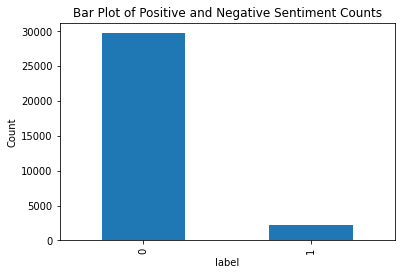

In [13]:
label_groups = train_data.groupby('label').count()
plt.title('Bar Plot of Positive and Negative Sentiment Counts')
plt.xlabel('Sentiments')
plt.ylabel('Count')
label_groups['tweet'].plot(kind='bar')
plt.show()

**Observations**

* There are 31962 training samples and 17197 test samples
* The training set contains one extra column label
* The output variable label contains 2 values - 0, 1
* Hence, this is a binary classification problem
* Dataset is highly imbalanced. More number of negative sentiments 

# Data Cleaning 

In [ ]:
# null values
train_data.isna().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
test_data.isna().sum()

id       0
tweet    0
dtype: int64

Dataset contains no null values

In [ ]:
# dropping the column id as it is of no use for sentiment analysis
train_data.drop('id', inplace = True, axis=1)
test_data.drop('id', inplace = True, axis=1)


In [ ]:
print(train_data.columns)
print(test_data.columns)

Index(['label', 'tweet'], dtype='object')
Index(['tweet'], dtype='object')


In [ ]:
# Instantiating the lemmatizer to be used for cleaning
lemmatizer = WordNetLemmatizer() 

**Creating a Custom Preprocessing Method**

In [ ]:
def preprocess_tweet(tweet, ):
  tweet = re.sub(r'\S+(.com)','',tweet) # removing website links or emails
  tweet = re.sub(r'[^A-Za-z ]+', '', tweet) # removing other non-alphabetical characters 
  
  tweet_words = word_tokenize(tweet)
  cleaned_tweet = ''
  for word in tweet_words: 
    cleaned_tweet += ' ' + lemmatizer.lemmatize(word)
  return cleaned_tweet

Applying the preprocessing method to train and test samples

In [ ]:
train_data['cleaned_tweet'] = train_data['tweet'].apply(preprocess_tweet)

In [ ]:
test_data['cleaned_tweet'] = test_data['tweet'].apply(preprocess_tweet)

In [ ]:
print(train_data['tweet'][0])
print(train_data['cleaned_tweet'][0])

 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
 user when a father is dysfunctional and is so selfish he drag his kid into his dysfunction run


## Saving the Preprocessed CSV Files

In [ ]:
train_data.drop('tweet',inplace=True,axis=1)
test_data.drop('tweet',inplace=True,axis=1)

In [ ]:
train_data.to_csv('train_preprocessed.csv')
test_data.to_csv('test_preprocessed.csv')

## Exploratory Data Analysis

In [ ]:
train_data = pd.read_csv('train_preprocessed.csv')
test_data = pd.read_csv('test_preprocessed.csv')

In [ ]:
train_data.drop('Unnamed: 0',axis=1,inplace=True)
test_data.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
corpus =''
for tweet in train_data['cleaned_tweet']:
  corpus+= ' ' + tweet
for tweet in test_data['cleaned_tweet']:
  corpus+= ' ' + tweet

**Finding Unique Words**

In [ ]:
print(len(set(word_tokenize(corpus))),'Unique Words')

49176 Unique Words


In [ ]:
word_cloud = WordCloud(width=2000, background_color='white',height=1200,stopwords=STOPWORDS).generate(corpus)

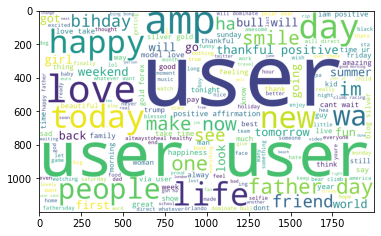

In [ ]:
plt.imshow(word_cloud)

## The End